<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/Midterm_Abraham_Mathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## IADS midterm

Please ensure all code is executed and the corresponding outputs are included. Write the code directly in this notebook rather than creating a new one.
Part 1: Multiple choice and theoretic questions

Please write your answer after each question
Question 1. What would the p-value of 0.04 mean for t-test comparing two samples of observations (select all that applies):

A) sample averages are at least 4% different

B) the samples follow the underlying distributions with the same mean

C) the samples follow the underlying distributions with the different mean

D) one can reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-values is below 0.05

E) one can't reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or 95% confidence) singe p-value does not reach 0.05

F) one can reject the null hypothesis that the samples follows the underlying distributions with the different means at 5% significance level (or 95% confidence)

G) probability that two samples have the same means is 4%

Answer: one can reject the null hypothesis that the samples follow the underlying distributions with the same mean at 5% significance level (or with 95% confidence) since p-value is below 0.05

Question 2. What is true regarding normal and log-normal distributions:

A) Quantities following log-normal distributions have higher probabilities for outliers compared to normal distributions

B) Outliers significantly different from the mean are more common for the normally distributed variables compared to log normally distributed variables

C) Logarithm of the normally distributed quantity follow a log-normal distribution

D) Logarithm of the log-normally distributed quantity follows a normal distribution

E) Probability density function of the log-normally distributed variable equals to the logarithm of the probability density function of the normally distributed variable

Answer: Logarithm of the log-normally distributed quantity follows a normal distribution

Question 3.

Imagine training a model which considers multiple sattelite images of urban traffic and tries to find groups of typical (repeated with minor deviations) scenarios. How would you classify this problem from Machine Learning perspective?

A) Supervised leanring;

B) Unsupervised learning;

C) Semi-supervised learning;

D) Reinforcement learning.

Explain you choice:

Answer:The given task could also be described as finding 'groups of typical scenarios (repeated with minor deviations)' from satellite images. Hence, it implies typical clustering or pattern recognition with no predefined labels. In unsupervised learning, the model can be trained using input data with no target labels explicitly provided. For that reason, this works well with tasks like clustering or discovering hidden patterns in data. This flexible procedure justifies the term 'unsupervised learning' since no labels or supervision are mentioned here, and it can be applied to various scenarios.

Question 4.

Please explain why would you need separate training, validation and test samples to learn the model. In which cases you may need all three, including a validation sample?

Answer:
Machine learning requires separate training, validation, and test samples for the model to generalize well to new, unseen data. Here is why each is important:

Training Sample: This forms the dataset on which the model is trained. The model learns the patterns, weights, or parameters from this data. However, just using training data results in overfitting, where a model may perform exceptionally well while trained with training data but poorly on unseen data.

Validation Sample: This is the dataset, which actually serves for tuning the model's hyperparameters and checking its performance during training. We will check for overfitting and modify model complexity because the performance is checked against a validation set that is different from those used to train. It assists in the selection of the best version of the model, for example, during cross-validation or optimizing hyperparameters.

Test Sample: The test set is used only when the model is finalized. This ensures an unbiased estimate of the model's performance on completely unseen data and how it would fare in practical scenarios. It is expected to avoid tuning the model on this data to avoid leakage or biased results.

When would you need all three?

It would help if we had all three-training, validation, and test-in cases where:
We are working with a large dataset. Hyperparameter tuning or model selection needs to be done and want to evaluate model performance from the tuning process independently.

For smaller datasets or simpler models, we can use training and test sets alone, applying cross-validation on the training data instead. For most real-world deep learning and complex models, though, using all three together is normally best practice to avoid overfitting and ensure a really robust evaluation of model performance.




In [2]:
# !pip install rtree
# !pip install pygeos
# !pip install geopandas

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Part 2: NYPD data analysis

In this part, you need to download New York Police Department (NYPD) complaints data for 2019 and write code for three following sections (each having own sub-sections): Data cleaning, Exploratory analysis and Hypothesis testing
download NYPD complaints data:

two options:

    download with curl or urllib methods
    download with API



In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a directory in Google Drive to save the file (if needed)
import os
save_path = '/content/drive/My Drive/NYPD_data/'
os.makedirs(save_path, exist_ok=True)

# Download the file using curl and save it in Google Drive
!curl https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv?accessType=DOWNLOAD > NYPD_data.csv

# Move the downloaded file to the created directory in Google Drive
!mv NYPD_data.csv /content/drive/My\ Drive/NYPD_data/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2891M    0 2891M    0     0  5041k      0 --:--:--  0:09:47 --:--:-- 5273k


In [5]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,39468181,02/20/2008,07:00:00,02/23/2008,08:00:00,88.0,02/23/2008,107,BURGLARY,221.0,...,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F
1,50539499,08/21/2008,22:00:00,08/21/2008,23:00:00,19.0,08/22/2008,109,GRAND LARCENY,438.0,...,(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F
2,45223390,04/03/2008,03:35:00,04/03/2008,03:50:00,77.0,04/03/2008,106,FELONY ASSAULT,109.0,...,(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F
3,50594658,08/19/2008,09:00:00,NaN,(null),32.0,08/27/2008,341,PETIT LARCENY,349.0,...,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M
4,44451016,03/10/2008,22:00:00,03/10/2008,22:10:00,67.0,03/11/2008,105,ROBBERY,397.0,...,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M


In [6]:
data.shape

(8914838, 35)

In [7]:
data.OFNS_DESC.unique()

array(['BURGLARY', 'GRAND LARCENY', 'FELONY ASSAULT', 'PETIT LARCENY',
       'ROBBERY', 'OFFENSES AGAINST THE PERSON',
       'ASSAULT 3 & RELATED OFFENSES', 'INTOXICATED & IMPAIRED DRIVING',
       'CRIMINAL TRESPASS', 'HARRASSMENT 2',
       'OTHER OFFENSES RELATED TO THEF', 'DANGEROUS WEAPONS',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD', 'DANGEROUS DRUGS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MISCELLANEOUS PENAL LAW',
       'SEX CRIMES', 'VEHICLE AND TRAFFIC LAWS', 'RAPE', 'ARSON',
       'FORGERY', 'GAMBLING', 'FRAUDS', "BURGLAR'S TOOLS",
       'DISORDERLY CONDUCT', 'ADMINISTRATIVE CODE',
       'UNAUTHORIZED USE OF A VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA',
       'POSSESSION OF STOLEN PROPERTY', '(null)',
       'OFFENSES INVOLVING FRAUD', 'PETIT LARCENY OF MOTOR VEHICLE',
       'FRAUDULENT ACCOSTING', 'ALCOHOLIC

In [8]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')



The complete data dictionary link is provided above. The focus of this notebook would be on columns - 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'OFNS_DESC', 'BORO_NM', 'PARKS_NM', 'Latitude', 'Longitude'.

The 'CMPLNT_NUM' is a unique id for each complaint, 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are date and time of complaint respectively, 'OFNS_DESC' is the type of offence reported, 'BORO_NM' is name of borough where complaint was reported, 'PARKS_NM' is name of park where complaint recorded (if any) and 'Latitude', 'Longitude' are location of complaint.
Section 1 - Data cleaning tasks
We have completed the majority of the data cleaning tasks, but there are still a few remaining items for you to address.(Marked as 'todo')

    Drop rows with a) missing/wrong complaint date and time b) missing borough name and c) duplicate complaint number ('CMPLNT_NUM' column)
    Filter out data where incident occured in a park or greenspace. Next, keep data for 2019 and after.
    Keep specific crime categories - type 1 crimes defined by FBI: The list is given here https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
    Filter by area (drop rows with location outside NYC)



1. filter out missing/wrong date and times, missing borough name and duplicate complaints from the data

In [9]:
data.isna().sum()

,0
CMPLNT_NUM,0
CMPLNT_FR_DT,655
CMPLNT_FR_TM,0
CMPLNT_TO_DT,1818958
CMPLNT_TO_TM,0
ADDR_PCT_CD,771
RPT_DT,0
KY_CD,0
OFNS_DESC,0
PD_CD,7593


In [10]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

In [11]:
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce').dt.time

In [12]:
print(data.CMPLNT_FR_DT.isna().sum())
print(data.CMPLNT_FR_TM.isna().sum())

828
48


In [13]:
data.dropna(subset=['CMPLNT_FR_DT', 'CMPLNT_FR_TM'], inplace=True)
data.shape

(8913963, 35)

In [14]:
data.drop_duplicates(subset=['CMPLNT_NUM'], inplace=True)
data.shape

(8912859, 35)

In [15]:
data.BORO_NM.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', '(null)',
       'STATEN ISLAND'], dtype=object)

In [6]:
import pandas as pd

# Load the data with low_memory=False to prevent DtypeWarning
data = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)

# Data Cleaning: Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Proceed with your further filtering or operations


In [7]:
data.BORO_NM.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

2. Remove rows where location is parks or greenspace and filter for 2019 and after

In [1]:
import pandas as pd

# Load the data with low_memory=False to prevent DtypeWarning
data = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)

# Data Cleaning (Preserve Original Column Names)
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Check for the presence of 'CMPLNT_FR_DT' column
print(f"'CMPLNT_FR_DT' column present: {'CMPLNT_FR_DT' in data.columns}")

# If the column is present, proceed with sorting:
if 'CMPLNT_FR_DT' in data.columns:
    ## Check the timeline of data
    print(data.sort_values(by='CMPLNT_FR_DT', ascending=True).head(3)['CMPLNT_FR_DT'])
    print(data.sort_values(by='CMPLNT_FR_DT', ascending=False).head(3)['CMPLNT_FR_DT'])
else:
    print("Column 'CMPLNT_FR_DT' not found in the DataFrame. Please check your data or column name.")


'CMPLNT_FR_DT' column present: True
225067     01/01/1948
6105718    01/01/1955
5701972    01/01/1955
Name: CMPLNT_FR_DT, dtype: object
7401026    12/31/2023
7268782    12/31/2023
7068599    12/31/2023
Name: CMPLNT_FR_DT, dtype: object


In [ ]:
import pandas as pd

# Load the data with low_memory=False to prevent DtypeWarning
data = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)

# Data Cleaning (Preserve Original Column Names)
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)']

# Check for the presence of 'CMPLNT_FR_DT' column
if 'CMPLNT_FR_DT' in data.columns:
    # Convert the 'CMPLNT_FR_DT' column to datetime
    data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

    # Filter out the data before 2019-01-01
    start_date = pd.to_datetime('2019-01-01')
    filtered_data = data[data['CMPLNT_FR_DT'] >= start_date]

    # Verify the filtering by checking the earliest and latest dates
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=True).head(3)['CMPLNT_FR_DT'])
    print(filtered_data.sort_values(by='CMPLNT_FR_DT', ascending=False).head(3)['CMPLNT_FR_DT'])
else:
    print("Column 'CMPLNT_FR_DT' not found in the DataFrame. Please check your data or column name.")


6608614   2019-01-01
8639461   2019-01-01
6813678   2019-01-01
Name: CMPLNT_FR_DT, dtype: datetime64[ns]
8638585   2023-12-31
8684374   2023-12-31
8747333   2023-12-31
Name: CMPLNT_FR_DT, dtype: datetime64[ns]


In [2]:
import pandas as pd

# Load the data with low_memory=False to prevent DtypeWarning
data = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)

# Data Cleaning: Remove rows where 'BORO_NM' is NaN or '(null)'
data = data[~data['BORO_NM'].isna()]  # Remove rows where 'BORO_NM' is NaN
data = data[data['BORO_NM'] != '(null)']  # Remove rows where 'BORO_NM' is '(null)'

# Convert 'CMPLNT_FR_DT' to datetime
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')

# Filter data to include only records from 2019 and after
start_date = pd.to_datetime('2019-01-01')
data = data[data['CMPLNT_FR_DT'] >= start_date]

# Remove rows where 'PREM_TYP_DESC' contains 'PARK' or 'PLAYGROUND'
data = data[~data['PREM_TYP_DESC'].str.contains('PARK|PLAYGROUND', case=False, na=False)]


In [3]:
data.shape


(2344299, 35)

In [4]:
data.PARKS_NM.unique()

array(['(null)', 'FLUSHING MEADOWS CORONA PARK', 'FORT TRYON PARK',
       'PARKSIDE PLAYGROUND BRONX', 'JESSE OWENS PLAYGROUND',
       'HUDSON RIVER PARK', 'LYONS POOL', 'J.J. BYRNE PLAYGROUND',
       'DE MATTI PLAYGROUND', 'SNUG HARBOR CULTURAL CENTER',
       'GRAVESEND PARK', 'BATH BEACH PARK', 'WASHINGTON PARK BROOKLYN',
       'COFFEY PARK', 'SEASIDE WILDLIFE NATURE PARK',
       'TONY DAPOLITO RECREATION CENTER', 'PROSPECT PARK',
       "JENNIFER'S PLAYGROUND", 'CHRISTOPHER PARK',
       'GRAND ARMY PLAZA BROOKLYN', 'RED HOOK RECREATION AREA',
       'LT. JOSEPH PETROSINO PARK', 'WASHINGTON SQUARE PARK',
       'BROOKLYN BRIDGE PARK', 'BENSONHURST PARK',
       'UNNAMED PARK ON SOUTHSIDE STATEN ISLAND EXPRESSWAY & SLOSSON AVENUE',
       'MIDLAND FIELD', 'GEN. DOUGLAS MACARTHUR PARK', 'BATTERY PARK',
       'FRANKLIN D. ROOSEVELT BOARDWALK AND BEACH',
       'JACKIE ROBINSON PLAYGROUND', 'TRIBECA PARK', 'CHELSEA PARK',
       'BELT PARKWAY/SHORE PARKWAY', 'WALT WHITMAN PARK',


In [5]:
data = data[data.PARKS_NM == '(null)']
data.shape

(2341835, 35)

3. keep type 1 crimes as defined by FBI from the data : https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions

The crime type is present in the 'OFNS_DESC' column. You just need to keep the following categories: "'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY' ,'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY'"

In [6]:
data.OFNS_DESC.unique()

array(['PETIT LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'FELONY ASSAULT', 'FORGERY', 'HARRASSMENT 2',
       'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'GRAND LARCENY',
       'ROBBERY', 'FRAUDS', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &',
       'VEHICLE AND TRAFFIC LAWS', 'ARSON',
       'UNAUTHORIZED USE OF A VEHICLE', 'DANGEROUS DRUGS', 'THEFT-FRAUD',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'RAPE',
       'INTOXICATED & IMPAIRED DRIVING', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'OTHER OFFENSES RELATED TO THEF',
       'OFFENSES AGAINST PUBLIC ADMINI', 'KIDNAPPING & RELATED OFFENSES',
       'PETIT LARCENY OF MOTOR VEHICLE', 'CRIMINAL TRESPASS',
       "BURGLAR'S TOOLS", 'JOSTLING', 'GAMBLING', 'ADMINISTRATIVE CODE',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OTHER STATE LAWS (NON PENAL LA',
       'MURDER & NON-NEGL. MANSLAU

In [8]:
data_type1 = data_typel[data_typel.OFNS_DESC.isin([
    'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
    'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
    'RAPE', 'ROBBERY'
])]

In [8]:
data_type1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,224005221,2021-02-03,22:00:00,02/03/2021,22:05:00,47.0,02/03/2021,106,FELONY ASSAULT,109.0,...,F,NaN,40.877393,-73.866491,"(40.87739338, -73.86649088)",PATROL BORO BRONX,(null),45-64,BLACK,M
1,235473363,2021-10-24,17:00:00,10/25/2021,08:00:00,33.0,10/25/2021,107,BURGLARY,223.0,...,(null),NaN,40.845215,-73.933959,"(40.845215, -73.933959)",PATROL BORO MAN NORTH,(null),25-44,BLACK,M
2,225212067,2021-03-05,23:50:00,03/06/2021,00:35:00,49.0,03/06/2021,106,FELONY ASSAULT,109.0,...,F,NaN,40.846363,-73.866533,"(40.846363, -73.866533)",PATROL BORO BRONX,(null),45-64,BLACK HISPANIC,M
3,234691633,2021-10-08,12:20:00,10/08/2021,12:30:00,49.0,10/08/2021,106,FELONY ASSAULT,109.0,...,M,NaN,40.859602,-73.865108,"(40.859602, -73.865108)",PATROL BORO BRONX,(null),25-44,UNKNOWN,M
4,231772515,2019-09-30,12:00:00,NaN,(null),106.0,08/04/2021,109,GRAND LARCENY,407.0,...,M,NaN,40.674100,-73.844419,"(40.6741, -73.844419)",PATROL BORO QUEENS SOUTH,(null),UNKNOWN,UNKNOWN,E


4. keep rows with location within NYC
zip codes file is present in the github 'Data' repository as "ZIPCODE.zip". We also have already used it in homework 2.

Do a spatial joint to keep only rows within NYC

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import zipfile
import os
# Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/NYPD_data/ZIPCODE(1).zip', 'r') as zip_ref:
    zip_ref.extractall('NYZIP')

# Checking the contents of the extracted directory
os.listdir('NYZIP')

['ZIP_CODE_040114.shx',
 'ZIP_CODE_040114.shp',
 'ZIP_CODE_040114.dbf',
 'ZIP_CODE_040114.shp.xml',
 'ZIP_CODE_040114.prj',
 'ZIP_CODE_040114.sbx',
 'ZIP_CODE_040114.sbn']

In [12]:
!pip install geopandas
import geopandas as gpd

## zip codes map
zips = gpd.read_file('/content/ZIPCODE/ZIP_CODE_040114.shp') # Using gpd to read the shapefile, providing the full path
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


Note: 'ZIPCODE' column has unique codes. The borough name is given in 'COUNTY' column. The counties and boroughs are synonymous in NYC. 'New York' county corresponds to Manhattan, 'Kings' to Brooklyn, 'Richmond' to Staten Island

In [13]:
zips.COUNTY.unique()

array(['Queens', 'Kings', 'Bronx', 'New York', 'Richmond'], dtype=object)

<Axes: >

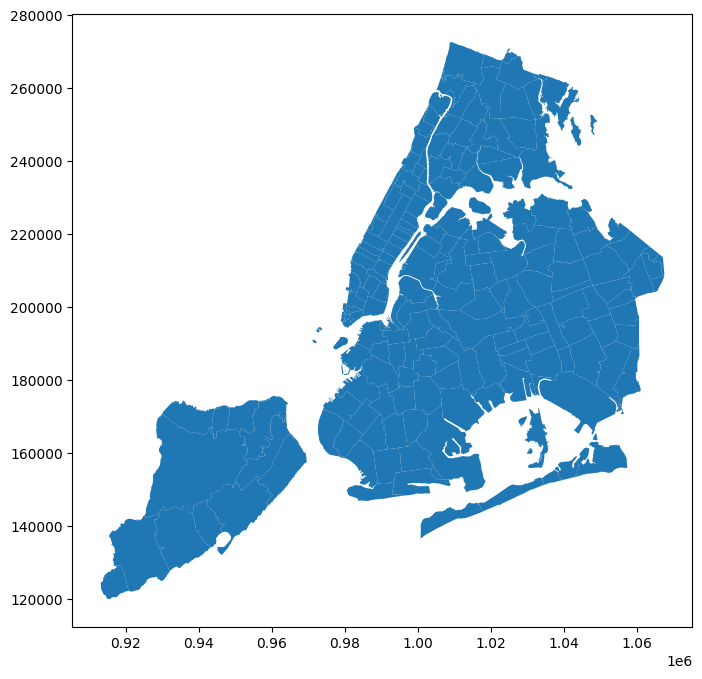

In [14]:
zips.plot(figsize=(8,8))

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

data_typel = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', dtype={'CMPLNT_NUM': 'str'}, low_memory=False)


data_typel['geometry'] = data_typel.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)

# Convert to GeoDataFrame
geoCrime = gpd.GeoDataFrame(data_typel, geometry='geometry')

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
geoCrime = geoCrime.set_crs(epsg=4326)

# Filter for records after 2019
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')
start_date = pd.to_datetime('2019-01-01')
geoCrime = geoCrime[geoCrime['CMPLNT_FR_DT'] >= start_date]

# Remove rows where 'PREM_TYP_DESC' contains 'PARK' or 'PLAYGROUND'
geoCrime = geoCrime[~geoCrime['PREM_TYP_DESC'].str.contains('PARK|PLAYGROUND', case=False, na=False)]

# Convert to New York State Plane Coordinate System (EPSG:2263)
geoCrime = geoCrime.to_crs(epsg=2263)

# Check the filtered data
geoCrime.head()


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry
53,233475359,2021-09-08,21:00:00,NaN,(null),43.0,09/08/2021,341,PETIT LARCENY,333.0,...,NaN,40.820743,-73.848431,"(40.820743, -73.848431)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,D,POINT (1026201.04 238332.272)
6494,226363302,2021-04-01,00:10:00,04/01/2021,00:15:00,115.0,04/01/2021,121,CRIMINAL MISCHIEF & RELATED OF,269.0,...,NaN,40.757117,-73.860091,"(40.757117, -73.860091)",PATROL BORO QUEENS NORTH,(null),45-64,ASIAN / PACIFIC ISLANDER,M,POINT (1023010.83 215145.794)
6710,222531095,2021-01-02,14:22:00,01/02/2021,14:32:00,49.0,01/02/2021,341,PETIT LARCENY,333.0,...,NaN,40.851284,-73.852132,"(40.851284, -73.852132)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,D,POINT (1025157.901 249457.725)
7951,224005221,2021-02-03,22:00:00,02/03/2021,22:05:00,47.0,02/03/2021,106,FELONY ASSAULT,109.0,...,NaN,40.877393,-73.866491,"(40.87739338, -73.86649088)",PATROL BORO BRONX,(null),45-64,BLACK,M,POINT (1021171 258963.997)
9103,223417962,2021-01-22,10:00:00,NaN,(null),47.0,01/22/2021,113,FORGERY,725.0,...,NaN,40.873066,-73.858433,"(40.87306637, -73.85843262)",PATROL BORO BRONX,(null),UNKNOWN,UNKNOWN,E,POINT (1023402.001 257390.997)


1. time series plotting

Todo: group total crimes by daily numbers

Todo: plot as a time series

Data Preparation and Analysis:

    Data Loading and Filtering:
        Data Ingestion: The dataset, stored in data_typel, is loaded into memory.
        Temporal Filtering: Records are filtered to retain only those occurring on or after January 1, 2019.
        Spatial Filtering:
            Location Categorization: Locations classified as parks or playgrounds (based on the PREM_TYP_DESC column) are excluded.
            Crime Type Selection: Only records pertaining to the specified crime types are retained.
            Geographic Boundary: A spatial join is conducted with a shapefile defining the New York City boundary (e.g., ZIP code boundaries) to isolate crimes within the city limits.

    Data Transformation and Visualization:
        Geographic Referencing: Latitude and longitude coordinates are used to create a geometry column, transforming the dataset into a GeoDataFrame (geoCrime).
        Temporal Aggregation: The daily count of crimes is calculated.
        Data Export: The filtered and processed dataset is exported to a CSV file for future reference.
        Visualization: A time series plot is generated to illustrate the daily trend of the selected crime types over the specified time period.

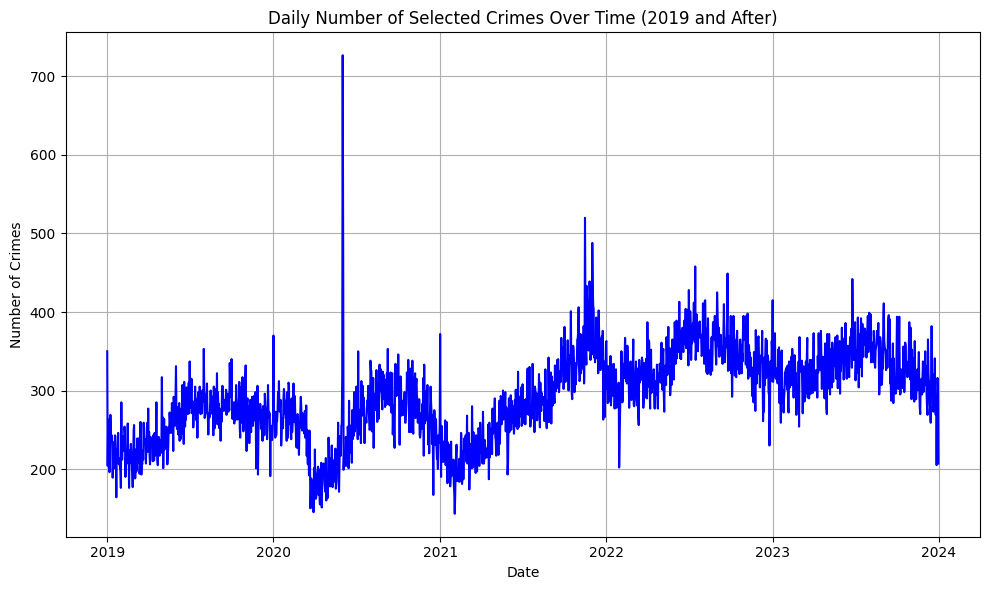

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load your data
data_typel = pd.read_csv('/content/drive/MyDrive/NYPD_data/NYPD_data.csv', low_memory=False)

# Convert 'CMPLNT_FR_DT' to datetime
data_typel['CMPLNT_FR_DT'] = pd.to_datetime(data_typel['CMPLNT_FR_DT'], errors='coerce')

# Filter for crimes that happened in 2019 and after
start_date = pd.to_datetime('2019-01-01')
data_typel = data_typel[data_typel['CMPLNT_FR_DT'] >= start_date]

# Remove rows where 'PREM_TYP_DESC' contains 'PARK' or 'PLAYGROUND'
data_typel = data_typel[~data_typel['PREM_TYP_DESC'].str.contains('PARK|PLAYGROUND', case=False, na=False)]

# Filter for specific offenses and make a copy to avoid SettingWithCopyWarning
data_type1 = data_typel[data_typel.OFNS_DESC.isin([
    'ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
    'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
    'RAPE', 'ROBBERY'
])].copy()

# Convert latitude and longitude to a geometry column for NYC boundary check
data_type1['geometry'] = data_type1.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
geoCrime = gpd.GeoDataFrame(data_type1, geometry='geometry')

# Set CRS to WGS84 (EPSG:4326)
geoCrime = geoCrime.set_crs(epsg=4326)

# Load NYC boundary or ZIP code shapefile to filter crimes beyond NYC
nyc_boundaries = gpd.read_file('/content/ZIPCODE/ZIP_CODE_040114.shp')

# Ensure the CRS matches for both GeoDataFrames
nyc_boundaries = nyc_boundaries.to_crs(epsg=4326)

# Perform spatial join to filter crimes within NYC boundaries
geoCrime = gpd.sjoin(geoCrime, nyc_boundaries, how="inner", predicate="within")

# Group by the 'CMPLNT_FR_DT' (complaint date) and count the number of crimes per day
daily_crimes = geoCrime.groupby(geoCrime['CMPLNT_FR_DT'].dt.date).size().reset_index(name='Total_Crimes')

# Convert 'CMPLNT_FR_DT' back to datetime for plotting
daily_crimes['CMPLNT_FR_DT'] = pd.to_datetime(daily_crimes['CMPLNT_FR_DT'])

# Save filtered data as a CSV
geoCrime.to_csv('/content/drive/MyDrive/crimes_NYC.csv', index=False)

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(daily_crimes['CMPLNT_FR_DT'], daily_crimes['Total_Crimes'], color='blue')
plt.title('Daily Number of Selected Crimes Over Time (2019 and After)')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


2. plotting on borough and zip code level normalized by population

Spatial Filtering and Borough Identification

The yc_boundaries shapefile does not directly provide borough-level information. However, it includes relevant columns such as ZIPCODE, COUNTY, and POPULATION. To approximate borough-level analysis, we leverage the COUNTY column.

While not a perfect one-to-one mapping, New York City's boroughs generally correspond to specific counties. The following mapping is employed:

    Manhattan: New York County
    Brooklyn: Kings County
    Queens: Queens County
    Bronx: Bronx County
    Staten Island: Richmond County

By mapping the COUNTY column to these borough names, we can subsequently group the data by borough for further analysis.

In [4]:
nyc_boundaries.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

         BORO_NM  Total_Crimes  POPULATION  Crimes_Per_100k
0          BRONX        118705   1431301.0      8293.503603
1       BROOKLYN        145990   2548896.0      5727.577743
2      MANHATTAN        144312   1687421.0      8552.222593
3         QUEENS        111513   2262768.0      4928.167625
4  STATEN ISLAND         14258    468220.0      3045.149716


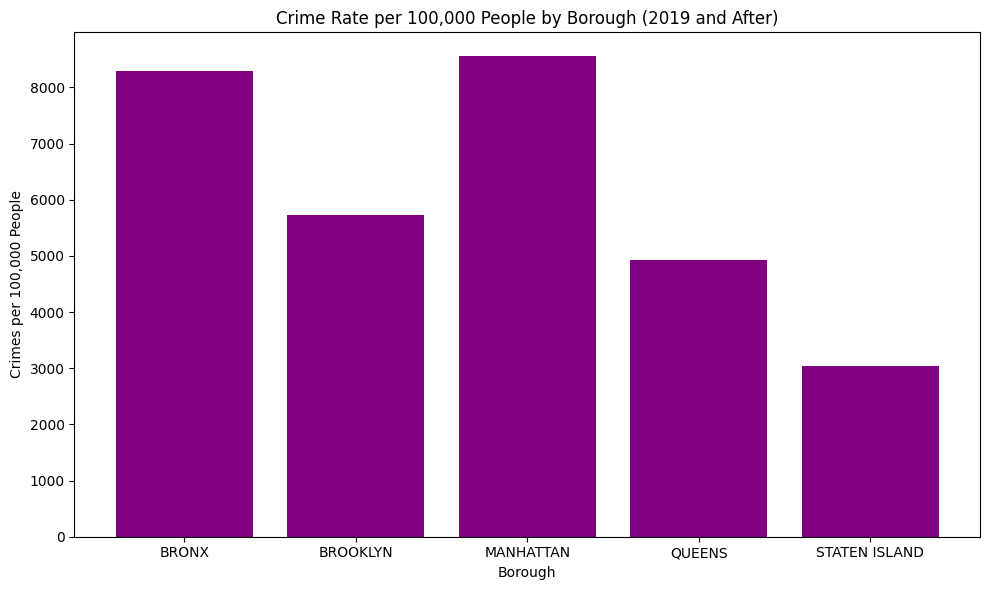

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Load NYC ZIP code shapefile (includes population)
nyc_boundaries = gpd.read_file('/content/ZIPCODE/ZIP_CODE_040114.shp')

# Map COUNTY to boroughs
county_to_borough = {
    'New York': 'MANHATTAN',
    'Kings': 'BROOKLYN',
    'Queens': 'QUEENS',
    'Bronx': 'BRONX',
    'Richmond': 'STATEN ISLAND'
}

# Add borough names to the nyc_boundaries GeoDataFrame
nyc_boundaries['BORO_NM'] = nyc_boundaries['COUNTY'].map(county_to_borough)

# Group ZIP population data by borough and sum the population for each borough
borough_population = nyc_boundaries.groupby('BORO_NM')['POPULATION'].sum().reset_index()

# Group crime data by borough
borough_crimes = geoCrime.groupby('BORO_NM').size().reset_index(name='Total_Crimes')

# Merge crime and population data on borough
borough_data = pd.merge(borough_crimes, borough_population, on='BORO_NM')

# Normalize by population (per 100,000 people)
borough_data['Crimes_Per_100k'] = (borough_data['Total_Crimes'] / borough_data['POPULATION']) * 100000

# Display the results
print(borough_data[['BORO_NM', 'Total_Crimes', 'POPULATION', 'Crimes_Per_100k']])

# Plot normalized crime rate per 100,000 people by borough
plt.figure(figsize=(10,6))
plt.bar(borough_data['BORO_NM'], borough_data['Crimes_Per_100k'], color='purple')
plt.title('Crime Rate per 100,000 People by Borough (2019 and After)')
plt.xlabel('Borough')
plt.ylabel('Crimes per 100,000 People')
plt.tight_layout()

# Show the plot
plt.show()



Todo: now group by zip codes, normalize by their population

Todo:plot as a heatmap with quantiles color scheme


Did a spatial join between the crime data points and the ZIP code boundaries to conduct a spatial analysis of crime rates.
Map each crime incident with its corresponding ZIP code based on geographic location. Then, the crime counts are grouped by ZIP code to obtain the total number of crimes within each ZIP code.

crime counts are normalized by the respective ZIP code populations, to create a a crime rate per 100,000 people.

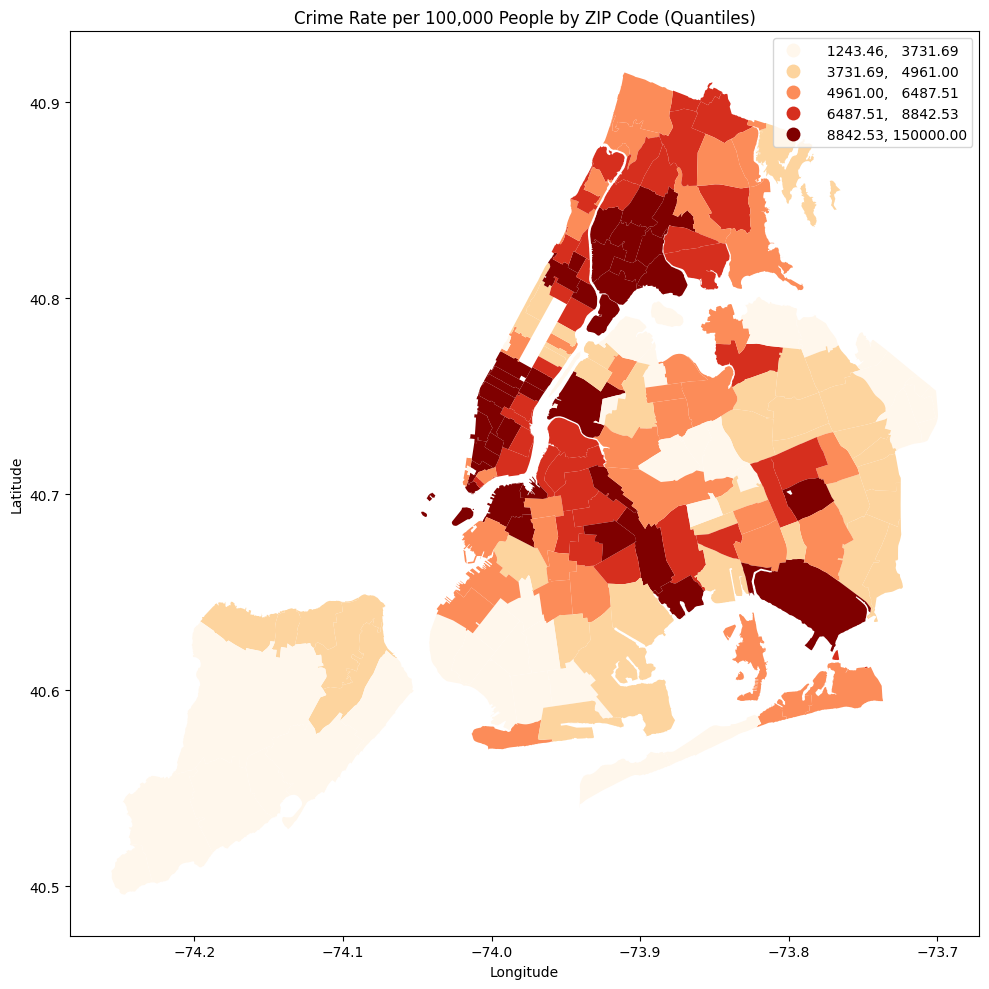

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Load NYC ZIP code shapefile (includes population)
nyc_boundaries = gpd.read_file('/content/ZIPCODE/ZIP_CODE_040114.shp')

# Convert the crime data into a GeoDataFrame (if it isn't already)
geoCrime = gpd.GeoDataFrame(geoCrime, geometry=gpd.points_from_xy(geoCrime['Longitude'], geoCrime['Latitude']))

# Ensure CRS matches for both GeoDataFrames
geoCrime = geoCrime.set_crs(epsg=4326)
nyc_boundaries = nyc_boundaries.to_crs(epsg=4326)

# Spatial join to link crimes to ZIP codes, use suffixes to avoid column conflicts
geoCrime_zip = gpd.sjoin(geoCrime, nyc_boundaries, how="inner", predicate="within", rsuffix='_boundary')

# Convert both ZIPCODE columns to string to ensure consistent data types
geoCrime_zip['ZIPCODE_left'] = geoCrime_zip['ZIPCODE_left'].astype(str)
nyc_boundaries['ZIPCODE'] = nyc_boundaries['ZIPCODE'].astype(str)

# Group crimes by ZIP code using 'ZIPCODE_left' from the original shapefile
zip_crime_count = geoCrime_zip.groupby('ZIPCODE_left').size().reset_index(name='Total_Crimes')

# Merge crime counts with population data from the ZIP boundaries
zip_data = pd.merge(zip_crime_count, nyc_boundaries[['ZIPCODE', 'POPULATION', 'geometry']], left_on='ZIPCODE_left', right_on='ZIPCODE')

# Filter out ZIP codes with zero or very small population to avoid division by zero or very large crime rates
zip_data = zip_data[zip_data['POPULATION'] > 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Normalize crime count by population (crimes per 100,000 people) using .loc[]
zip_data.loc[:, 'Crimes_Per_100k'] = (zip_data['Total_Crimes'] / zip_data['POPULATION']) * 100000

# Replace 'inf' values (if any) with NaN or some other value
zip_data.loc[:, 'Crimes_Per_100k'] = zip_data['Crimes_Per_100k'].replace([float('inf'), -float('inf')], pd.NA)

# Convert zip_data back to a GeoDataFrame for plotting
zip_data_gdf = gpd.GeoDataFrame(zip_data, geometry='geometry')

# Plot the heatmap using a quantile color scheme
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Plot the normalized crime rate as a heatmap
zip_data_gdf.plot(column='Crimes_Per_100k', cmap='OrRd', scheme='quantiles', legend=True, ax=ax)

# Add title and labels
plt.title('Crime Rate per 100,000 People by ZIP Code (Quantiles)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()

3. bar plot of total crimes vs a) months b) day of week and c) hour of day

Missing or invalid times: 0


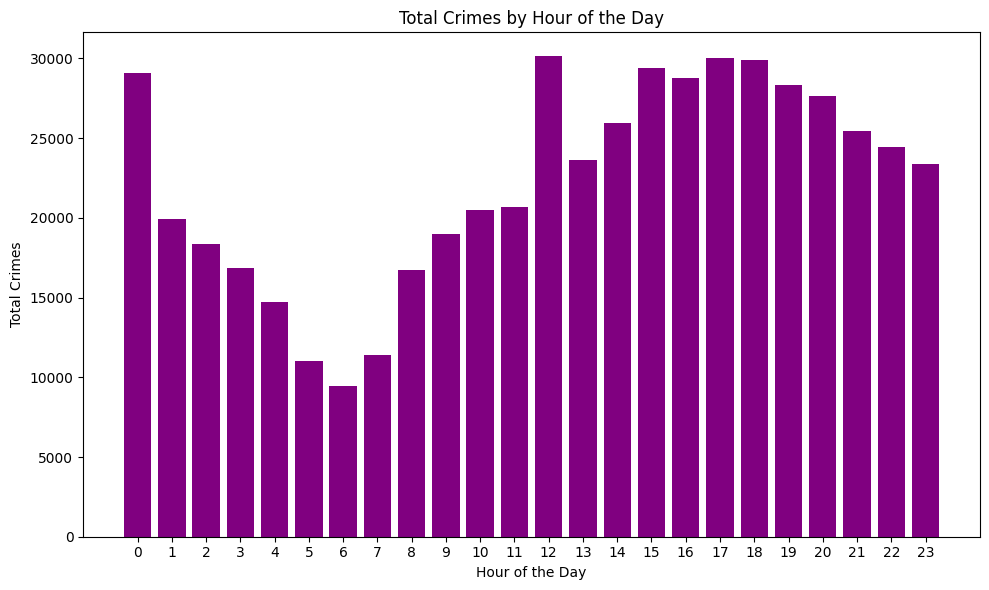

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format and check for missing time data
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')
geoCrime['CMPLNT_FR_TM'] = pd.to_datetime(geoCrime['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')

# Check for missing or invalid times
missing_times = geoCrime['CMPLNT_FR_TM'].isnull().sum()
print(f'Missing or invalid times: {missing_times}')

# If times are missing, fill with a default value or filter out those rows
geoCrime = geoCrime.dropna(subset=['CMPLNT_FR_TM'])

# Extract hour of the day from 'CMPLNT_FR_TM' if it exists
geoCrime['HourOfDay'] = geoCrime['CMPLNT_FR_TM'].dt.hour

# 3. Bar plot: Total crimes by hour of the day
hour_crimes = geoCrime.groupby('HourOfDay').size().reset_index(name='Total_Crimes')

plt.figure(figsize=(10, 6))
plt.bar(hour_crimes['HourOfDay'], hour_crimes['Total_Crimes'], color='purple')
plt.title('Total Crimes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crimes')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


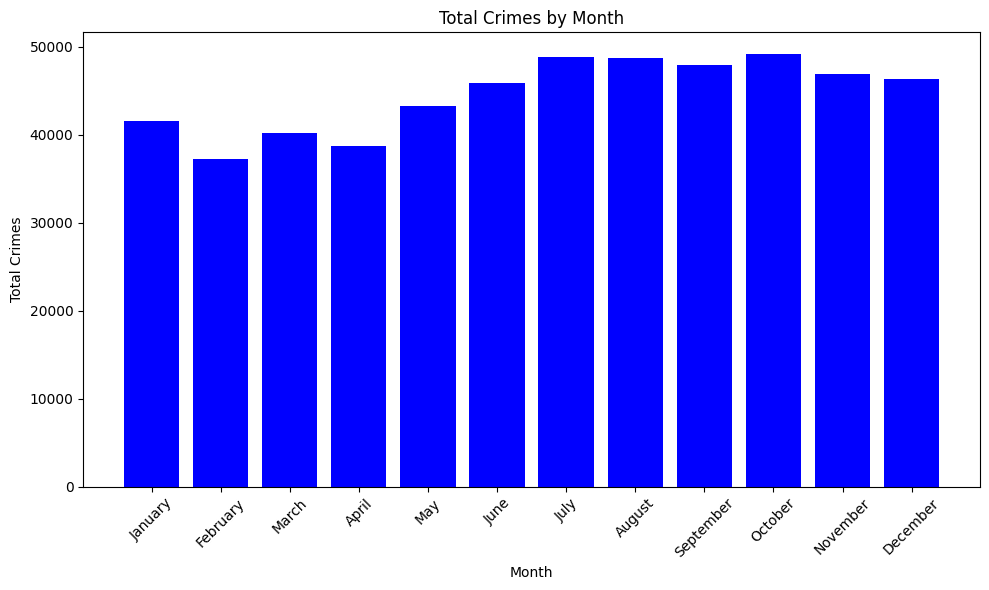

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Extract the month from the 'CMPLNT_FR_DT' column
geoCrime['Month'] = geoCrime['CMPLNT_FR_DT'].dt.month_name()

# Group crimes by month and count occurrences
month_crimes = geoCrime.groupby('Month').size().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
).reset_index(name='Total_Crimes')

# Bar plot: Total crimes by month
plt.figure(figsize=(10, 6))
plt.bar(month_crimes['Month'], month_crimes['Total_Crimes'], color='blue')
plt.title('Total Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


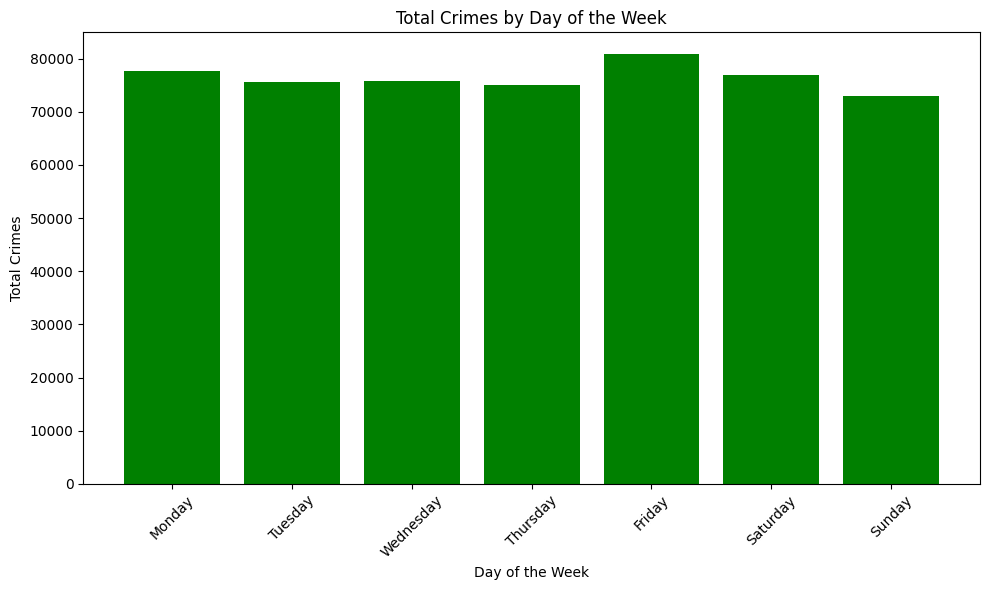

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Extract the day of the week from the 'CMPLNT_FR_DT' column
geoCrime['DayOfWeek'] = geoCrime['CMPLNT_FR_DT'].dt.day_name()

# Group crimes by day of the week and count occurrences
weekday_crimes = geoCrime.groupby('DayOfWeek').size().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index(name='Total_Crimes')

# Bar plot: Total crimes by day of the week
plt.figure(figsize=(10, 6))
plt.bar(weekday_crimes['DayOfWeek'], weekday_crimes['Total_Crimes'], color='green')
plt.title('Total Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Calculate the total number of crimes (each row is one crime)
total_crimes = geoCrime.shape[0]

# Print the total number of crimes
print(f"Total number of crimes: {total_crimes}")

Total number of crimes: 534842


In [24]:
import pandas as pd

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Display all unique types of crimes in the 'OFNS_DESC' column
crime_types = geoCrime['OFNS_DESC'].unique()

# Print the total number of different crime types and display them
print(f"Total number of different crime types: {len(crime_types)}")
print("Types of crimes:")
print(crime_types)


Total number of different crime types: 8
Types of crimes:
['FELONY ASSAULT' 'BURGLARY' 'GRAND LARCENY' 'ROBBERY' 'ARSON'
 'GRAND LARCENY OF MOTOR VEHICLE' 'RAPE' 'MURDER & NON-NEGL. MANSLAUGHTER']


In [25]:
import pandas as pd

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Filter the data for the specific crime types
crime_types_list = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
                    'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER',
                    'RAPE', 'ROBBERY']

# Filter to include only these crime types
filtered_data = geoCrime[geoCrime['OFNS_DESC'].isin(crime_types_list)]

# Group by the crime type ('OFNS_DESC') and count the total number of crimes for each
crime_counts = filtered_data.groupby('OFNS_DESC').size().reset_index(name='Total_Crimes')

# Print the results
print(crime_counts)


                         OFNS_DESC  Total_Crimes
0                            ARSON          3340
1                         BURGLARY         67720
2                   FELONY ASSAULT        116214
3                    GRAND LARCENY        215246
4   GRAND LARCENY OF MOTOR VEHICLE         51833
5  MURDER & NON-NEGL. MANSLAUGHTER          2006
6                             RAPE          6444
7                          ROBBERY         72039


4. Bar plots: Felony assault vs grand larceny grouped by a) day of week and b) hour of day

Total city population: 8398606.0


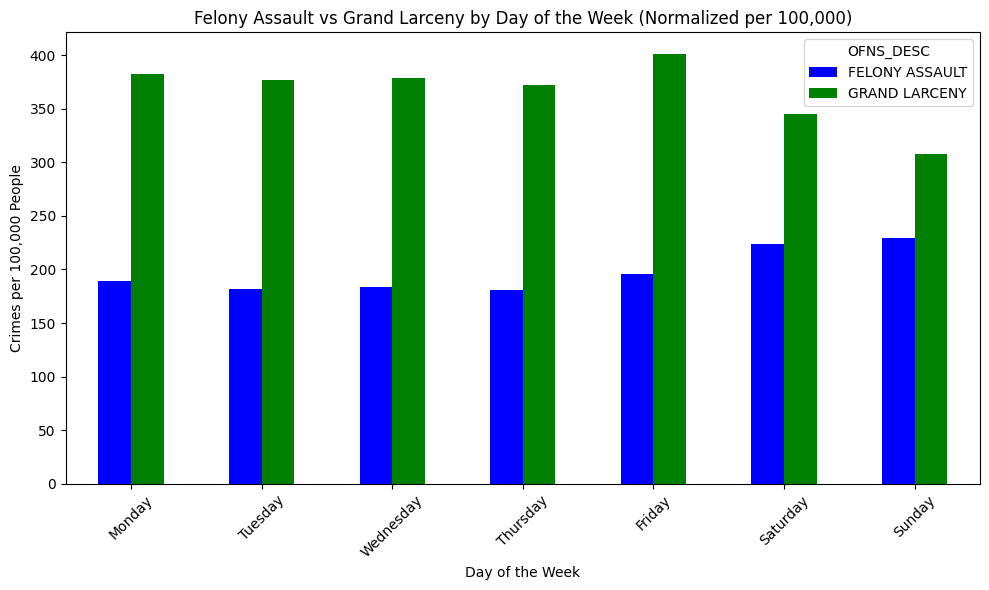

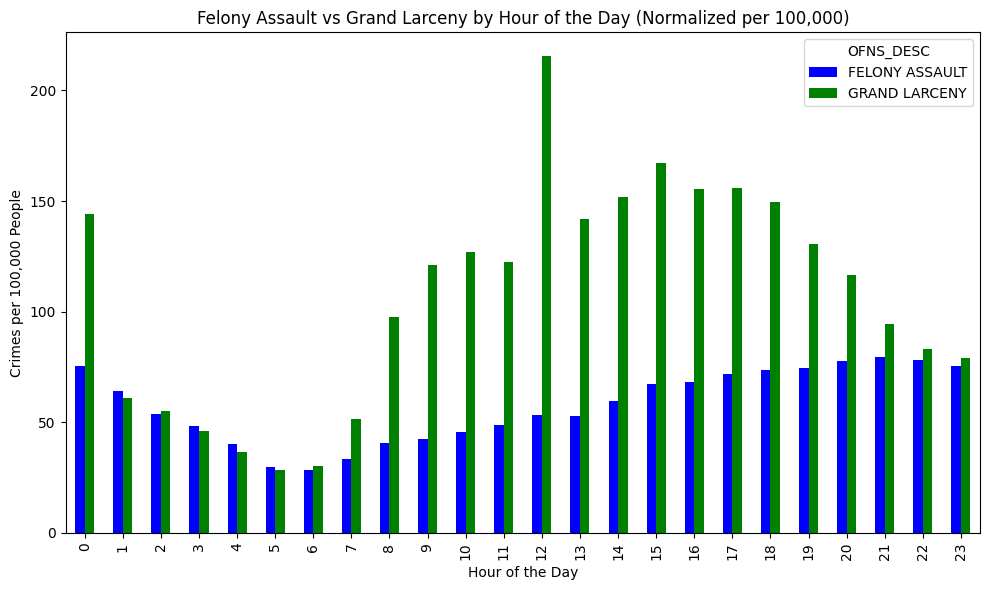

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the NYC ZIP code shapefile (includes population)
nyc_boundaries = gpd.read_file('/content/ZIPCODE/ZIP_CODE_040114.shp')

# Calculate the total population from the 'POPULATION' column
city_population = nyc_boundaries['POPULATION'].sum()
print(f"Total city population: {city_population}")

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' and 'CMPLNT_FR_TM' are in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')
geoCrime['CMPLNT_FR_TM'] = pd.to_datetime(geoCrime['CMPLNT_FR_TM'], format='%H:%M:%S', errors='coerce')

# Todo: filter data for Felony Assault and Grand Larceny
filtered_data = geoCrime[geoCrime['OFNS_DESC'].isin(['FELONY ASSAULT', 'GRAND LARCENY'])].copy()

### Plot 1: Felony Assault vs Grand Larceny by Day of the Week (Normalized) ###
# Extract the day of the week
filtered_data.loc[:, 'DayOfWeek'] = filtered_data['CMPLNT_FR_DT'].dt.day_name()

# Group by 'DayOfWeek' and 'OFNS_DESC', then count the crimes
weekday_crimes = filtered_data.groupby(['DayOfWeek', 'OFNS_DESC']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).fillna(0)

# Normalize the crime numbers by total city population (per 100,000 people)
weekday_crimes_normalized = (weekday_crimes / city_population) * 100000

# Plot the bar plot for day of the week (normalized)
weekday_crimes_normalized.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Felony Assault vs Grand Larceny by Day of the Week (Normalized per 100,000)')
plt.xlabel('Day of the Week')
plt.ylabel('Crimes per 100,000 People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot 2: Felony Assault vs Grand Larceny by Hour of the Day (Normalized) ###
# Extract the hour of the day
filtered_data.loc[:, 'HourOfDay'] = filtered_data['CMPLNT_FR_TM'].dt.hour

# Group by 'HourOfDay' and 'OFNS_DESC', then count the crimes
hourly_crimes = filtered_data.groupby(['HourOfDay', 'OFNS_DESC']).size().unstack().fillna(0)

# Normalize the crime numbers by total city population (per 100,000 people)
hourly_crimes_normalized = (hourly_crimes / city_population) * 100000

# Plot the bar plot for hour of the day (normalized)
hourly_crimes_normalized.plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Felony Assault vs Grand Larceny by Hour of the Day (Normalized per 100,000)')
plt.xlabel('Hour of the Day')
plt.ylabel('Crimes per 100,000 People')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()



Section 3 - Hypothesis testing tasks

    Plot the distribution (density plot) of daily number of total type 1 crimes for 2019. Test the hypothesis if the distribution follows normal distribution.

    Plot the distributions (density plots) of daily number of total type 1 crimes for weekdays and weekends (normalized by population) and perform a) the t-test for the hypothesis that the average daily crime over weekdays and weekends is the same, b) the KS-test for the hypothesis that the weekday and weekend daily crime numbers follow the same distribution. Can you reject either hypothesis at the 10% significance level?



In [32]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles

    if log_scale:
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))

    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve,
        bins=bins,color = 'darkblue',
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})

    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)

    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values
    #(to make sure the fitted distribution would not affect it)

    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters

    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')

    plt.xlabel(xlabel) #add x label
    plt.ylim(ylim) #restore the y-range of original distribution density values
    plt.show()
    return pars


1. plotting distributions and normality test

    Todo: group type 1 crime numbers per day for 2019

    Todo: plot the distribution (density plot)

    Todo: normality test



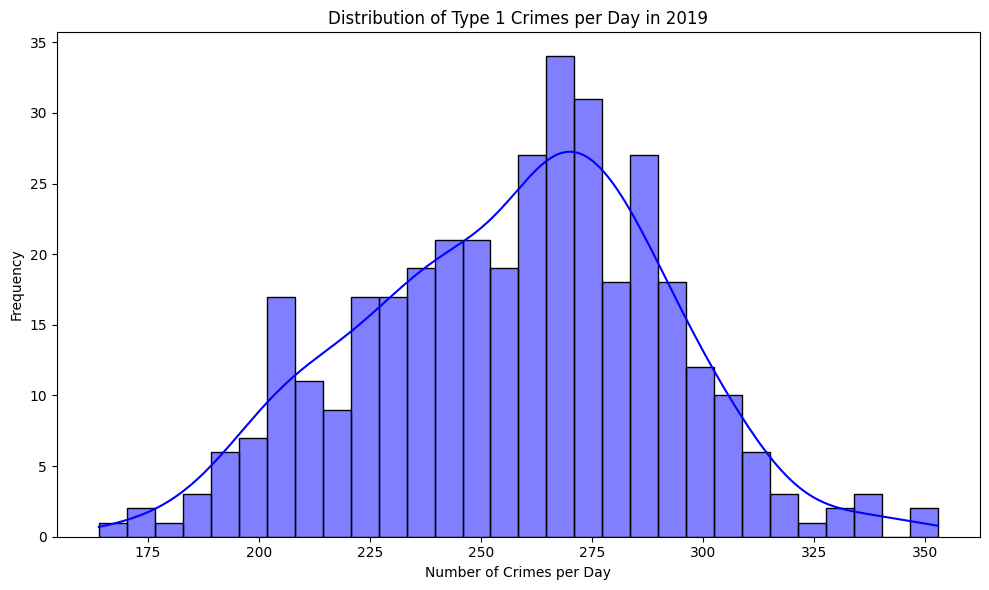

Shapiro-Wilk Test Statistic: 0.9927014527050941
p-value: 0.07224426977170763
Data follows a normal distribution (fail to reject H0).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Filter for 2019 data
geoCrime_2019 = geoCrime[geoCrime['CMPLNT_FR_DT'].dt.year == 2019]

# Todo: Filter for Type 1 crimes (as per your crime list)
type1_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
filtered_data = geoCrime_2019[geoCrime_2019['OFNS_DESC'].isin(type1_crimes)]

# Todo: Group Type 1 crime numbers per day
crime_per_day = filtered_data.groupby(filtered_data['CMPLNT_FR_DT'].dt.date).size()

# Todo: Plot the distribution (density plot)
plt.figure(figsize=(10, 6))
sns.histplot(crime_per_day, kde=True, bins=30, color='blue')
plt.title('Distribution of Type 1 Crimes per Day in 2019')
plt.xlabel('Number of Crimes per Day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Todo: Perform normality test (Shapiro-Wilk Test)
stat, p_value = shapiro(crime_per_day)
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretation of normality test
if p_value > 0.05:
    print("Data follows a normal distribution (fail to reject H0).")
else:
    print("Data does not follow a normal distribution (reject H0).")



weekdays vs weekend distribution

*   Todo: create dataframes for weekdays and weekends
*   Todo: group daily numbers for weekdays and weekends
*   Todo: plot distribution (density plot)
*   Todo: t-test
*   Todo: k-s test



 Create DataFrames for Weekdays and Weekends:

In [34]:
import pandas as pd

# Load the saved filtered data from CSV
geoCrime = pd.read_csv('/content/drive/MyDrive/crimes_NYC.csv', low_memory=False)

# Ensure 'CMPLNT_FR_DT' is in datetime format
geoCrime['CMPLNT_FR_DT'] = pd.to_datetime(geoCrime['CMPLNT_FR_DT'], errors='coerce')

# Filter for 2019 data
geoCrime_2019 = geoCrime[geoCrime['CMPLNT_FR_DT'].dt.year == 2019]

# Filter for Type 1 crimes (as per your list of crimes)
type1_crimes = ['ARSON', 'BURGLARY', 'FELONY ASSAULT', 'GRAND LARCENY',
                'GRAND LARCENY OF MOTOR VEHICLE', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'ROBBERY']
filtered_data = geoCrime_2019[geoCrime_2019['OFNS_DESC'].isin(type1_crimes)]

# Extract the day of the week (0 = Monday, 6 = Sunday)
filtered_data['DayOfWeek'] = filtered_data['CMPLNT_FR_DT'].dt.dayofweek

# Create DataFrames for weekdays (0-4) and weekends (5-6)
weekdays_data = filtered_data[filtered_data['DayOfWeek'] < 5]
weekends_data = filtered_data[filtered_data['DayOfWeek'] >= 5]

# Display the shape of each DataFrame
print("Weekdays Data Shape:", weekdays_data.shape)
print("Weekends Data Shape:", weekends_data.shape)


Weekdays Data Shape: (67726, 50)
Weekends Data Shape: (26147, 50)


Group Daily Numbers for Weekdays and Weekends

In [35]:
# Group daily numbers for weekdays and weekends
weekdays_crimes_per_day = weekdays_data.groupby(weekdays_data['CMPLNT_FR_DT'].dt.date).size()
weekends_crimes_per_day = weekends_data.groupby(weekends_data['CMPLNT_FR_DT'].dt.date).size()

# Display the grouped data
print("Weekdays Crime Counts per Day:\n", weekdays_crimes_per_day.head())
print("Weekends Crime Counts per Day:\n", weekends_crimes_per_day.head())


Weekdays Crime Counts per Day:
 CMPLNT_FR_DT
2019-01-01    350
2019-01-02    204
2019-01-03    260
2019-01-04    263
2019-01-07    222
dtype: int64
Weekends Crime Counts per Day:
 CMPLNT_FR_DT
2019-01-05    231
2019-01-06    196
2019-01-12    232
2019-01-13    189
2019-01-19    242
dtype: int64


Plot Distribution (Density Plot)

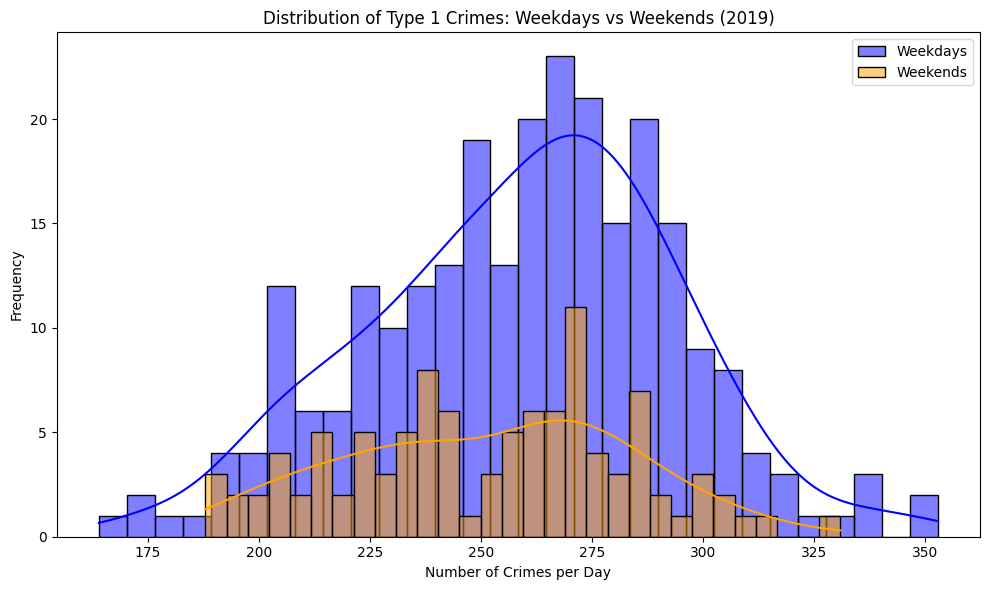

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of weekdays and weekends
plt.figure(figsize=(10, 6))
sns.histplot(weekdays_crimes_per_day, kde=True, color='blue', label='Weekdays', bins=30)
sns.histplot(weekends_crimes_per_day, kde=True, color='orange', label='Weekends', bins=30)
plt.title('Distribution of Type 1 Crimes: Weekdays vs Weekends (2019)')
plt.xlabel('Number of Crimes per Day')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


Perform t-test

In [37]:
from scipy.stats import ttest_ind

# Perform t-test between weekdays and weekends
t_stat, p_value_ttest = ttest_ind(weekdays_crimes_per_day, weekends_crimes_per_day, equal_var=False)

# Display t-test results
print(f'T-Test Statistic: {t_stat}')
print(f'p-value (T-Test): {p_value_ttest}')

# Interpretation of the t-test
if p_value_ttest > 0.05:
    print("No significant difference between weekday and weekend crime rates (fail to reject H0).")
else:
    print("Significant difference between weekday and weekend crime rates (reject H0).")


T-Test Statistic: 2.1411478956153163
p-value (T-Test): 0.033459078405739875
Significant difference between weekday and weekend crime rates (reject H0).


Perform K-S Test

In [38]:
from scipy.stats import ks_2samp

# Perform K-S test
ks_stat, p_value_ks = ks_2samp(weekdays_crimes_per_day, weekends_crimes_per_day)

# Display K-S test results
print(f'K-S Test Statistic: {ks_stat}')
print(f'p-value (K-S Test): {p_value_ks}')

# Interpretation of the K-S test
if p_value_ks > 0.05:
    print("No significant difference between the distributions (fail to reject H0).")
else:
    print("Significant difference between the distributions (reject H0).")


K-S Test Statistic: 0.13745210727969348
p-value (K-S Test): 0.10738263972457424
No significant difference between the distributions (fail to reject H0).
